After David Robinson's 'The '[circular random walk' puzzle: tidy simulation of stochastic processes in R](http://varianceexplained.org/r/cranberry-sauce/)' at [Variance Explained](varianceexplained.org).

In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('seaborn')

In [2]:
rng = np.random.default_rng(42424242)

In [3]:
seats = 20  # start position (0) is a seat
reps = 10000  # number of repetitions of simulation 
steps = 2000  # number of steps to simulate

In [4]:
df = pd.DataFrame(
    np.array(np.meshgrid(
        np.arange(1, reps + 1),
        np.arange(1, steps + 1))).T.reshape(-1, 2),
    columns=['trial', 'step']
)

In [5]:
df['direction'] = rng.integers(low=0, high=2, size=len(df)) * 2 - 1
df['position'] = df.groupby(['trial'])['direction'].cumsum()
df['seat'] = np.mod(df['position'], seats)

In [6]:
# drop rows for start seat
df.drop(df[df['seat'] == 0].index, inplace=True)
# drop repeated hits for seats after the first
df.drop_duplicates(
    subset=['trial', 'seat'],
    keep='first',
    inplace=True
)

In [7]:
df['trial_row'] = df.groupby(['trial'])['step'].rank(
    method='first').astype(int)
# drop trials in which not all seats get the sauce
df.drop(df[df.groupby(['trial'])['trial_row'].transform(np.max) != 19].index, inplace=True)
df['is_last'] = df['trial_row'] == (seats - 1)  # last seat reached

<IPython.core.display.Javascript object>


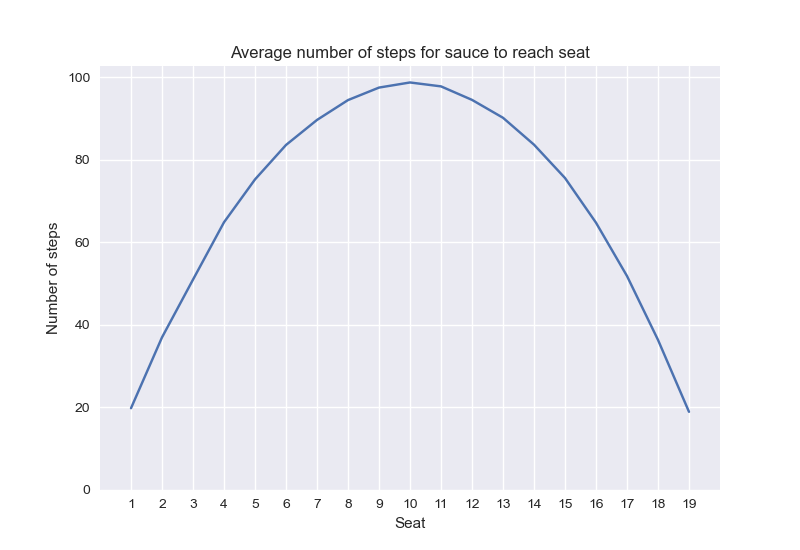

<IPython.core.display.Javascript object>


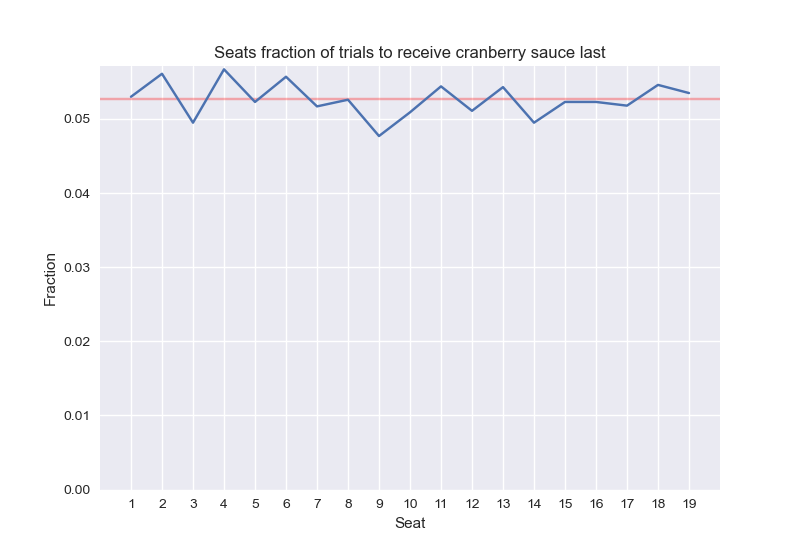

In [8]:
df_by_seat = df.groupby(['seat'])[['step', 'is_last']].mean()

plt.figure()
plt.plot(df_by_seat.index, df_by_seat['step'])
plt.xlim([0, seats])
plt.ylim(ymin=0)
plt.title('Average number of steps for sauce to reach seat')
plt.xlabel('Seat')
plt.ylabel('Number of steps')
plt.xticks(np.arange(1, 20))
plt.show()

plt.figure()
plt.plot(df_by_seat.index, df_by_seat['is_last'], zorder=10)
plt.axhline(y=(1 / (seats - 1)), c='r', alpha=0.3, zorder=1)
plt.xlim([0, seats])
plt.ylim(ymin=0)
plt.title('Seats fraction of trials to receive cranberry sauce last')
plt.xlabel('Seat')
plt.ylabel('Fraction')
plt.xticks(np.arange(1, 20))
plt.show()